<a href="https://colab.research.google.com/github/chahak31/Deep-Learning/blob/main/Potato_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# get the data from kaggle
!pip install -q kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd drive/MyDrive/Deep Learning/Potato Disease Classification/Dataset

/content/drive/MyDrive/Deep Learning/Potato Disease Classification/Dataset


In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Deep Learning/Potato Disease Classification'

In [5]:
!kaggle datasets download --force -d arjuntejaswi/plant-village

 97% 319M/329M [00:03<00:00, 77.1MB/s]
100% 329M/329M [00:03<00:00, 90.5MB/s]


In [6]:
# starting with the code

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [8]:
IMG_SIZE = 256
BATCH_SIZE = 32
CHANELS = 3
EPOCHS = 50

In [9]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size = (IMG_SIZE, IMG_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [10]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [11]:
len(dataset)

68

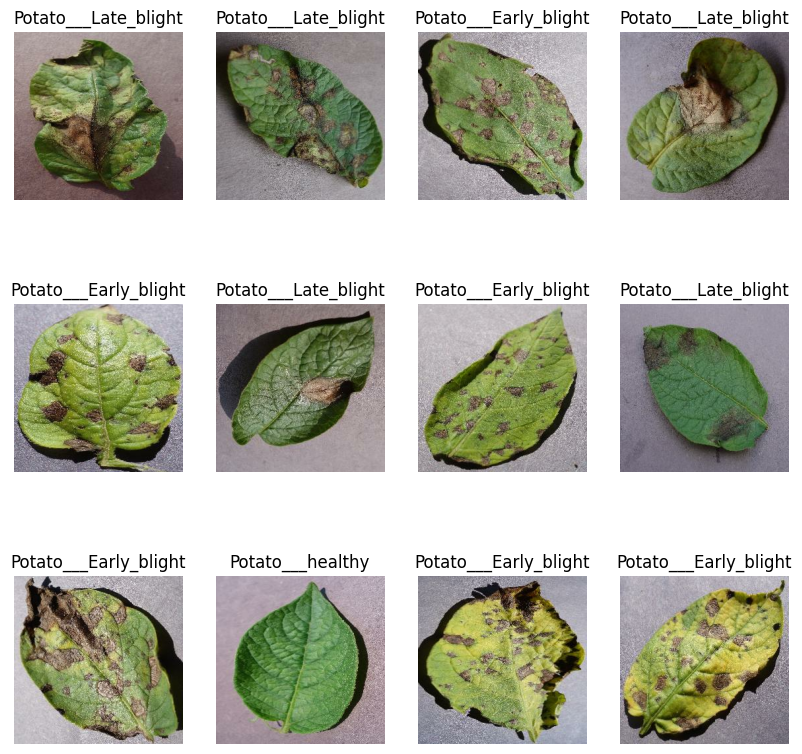

In [12]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
  for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")

In [13]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1,test_aplit=0.1, shuffle=True, shuffle_size = 1000):

  ds_size = len(ds)

  if shuffle:
    ds = ds.shuffle(shuffle_size, seed=12)

  train_size = int(train_split*ds_size)
  val_size = int(val_split*ds_size)

  train_ds = ds.take(train_size)
  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)
  return train_ds, val_ds, test_ds

In [14]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [15]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [16]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [17]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [18]:
# MODEL BUILDING

In [19]:
input_shape = (BATCH_SIZE,IMG_SIZE, IMG_SIZE,CHANELS)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape = input_shape),
    layers.MaxPooling2D(2,2),    
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),    
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),    
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),    
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),    
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')  
])

model.build(input_shape = input_shape)

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [21]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(train_ds,
          epochs = EPOCHS,
          batch_size=BATCH_SIZE,
          verbose=1,
          validation_data=val_ds)

Epoch 1/50
54/54 [==============================] - 436s 5s/step - loss: 0.8711 - accuracy: 0.5411 - val_loss: 0.6870 - val_accuracy: 0.6875
Epoch 2/50
54/54 [==============================] - 257s 5s/step - loss: 0.5569 - accuracy: 0.7297 - val_loss: 0.4056 - val_accuracy: 0.8333
Epoch 3/50
54/54 [==============================] - ETA: 0s - loss: 0.3998 - accuracy: 0.8241